In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(r'./Electric_Production.csv', parse_dates=['DATE'])
df

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


In [23]:
df.index = df['IPG2211A2N']

In [4]:
# daterng = pd.date_range(start='1985', periods=len(df['DATE']) ,freq='MS')
# daterng
# df['DATE'] = daterng

<AxesSubplot:>

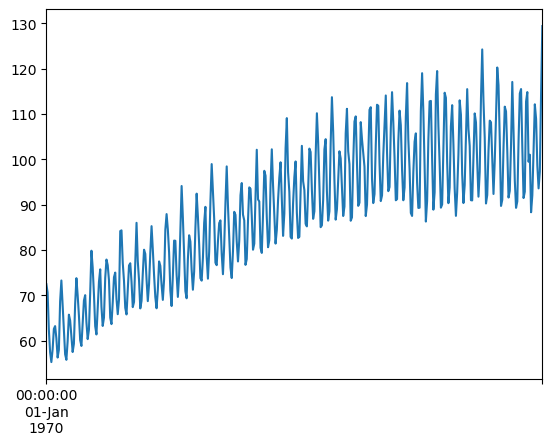

In [5]:
df['IPG2211A2N'].plot()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose(df, column_name):
    result_mul = seasonal_decompose(df[column_name], model = 'multiplicative', period = 12)
    result_add = seasonal_decompose(df[column_name], model = 'additive', extrapolate_trend='freq', period = 12)

    result_mul.plot().suptitle('Multiplicative Decompose')
    result_add.plot().suptitle('Additive Decompose')
    plt.show()
    return result_mul, result_add

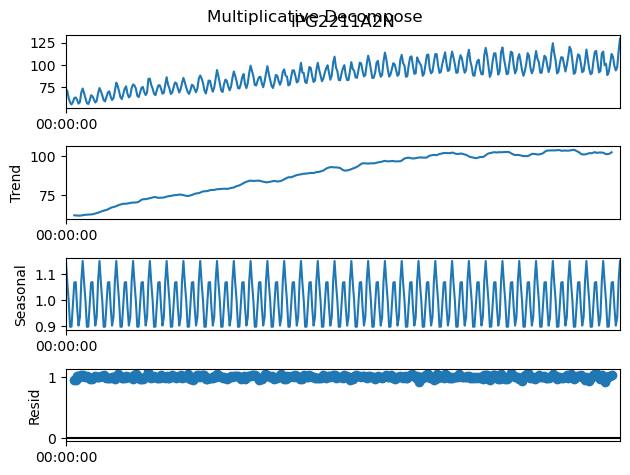

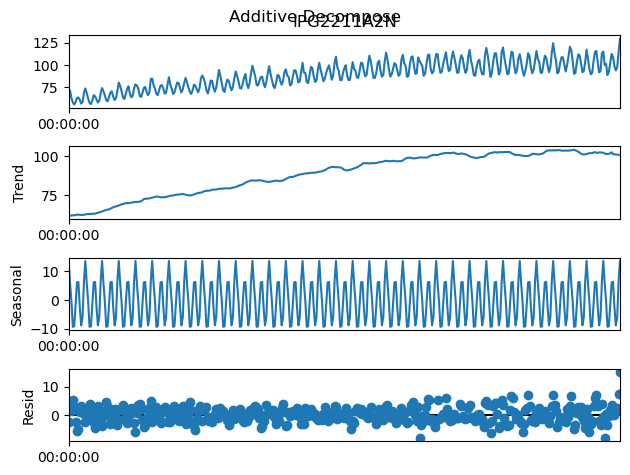

In [7]:
decom_mul, decom_add = decompose(df, 'IPG2211A2N')

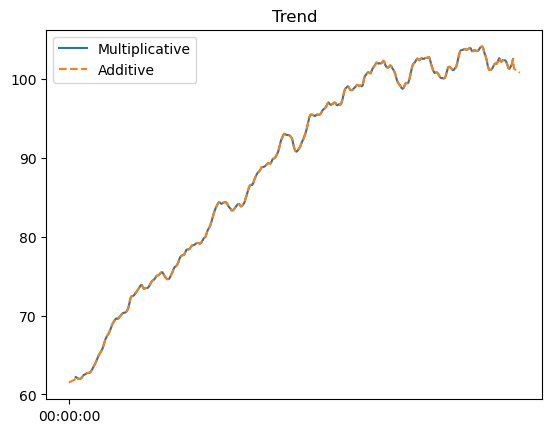

In [8]:
plt.plot(decom_mul.trend, label="Multiplicative")
plt.plot(decom_add.trend,label='Additive', linestyle='--')
plt.title("Trend")
plt.legend()
plt.show()

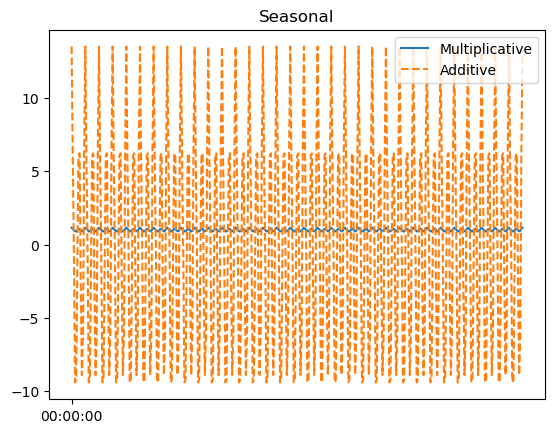

In [9]:
plt.plot(decom_mul.seasonal, label="Multiplicative")
plt.plot(decom_add.seasonal,label='Additive', linestyle='--')
plt.title("Seasonal")
plt.legend()
plt.show()

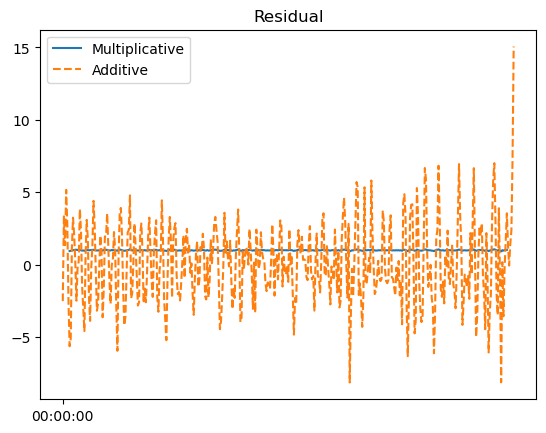

In [10]:
plt.plot(decom_mul.resid, label="Multiplicative")
plt.plot(decom_add.resid,label='Additive', linestyle='--')
plt.title("Residual")
plt.legend()
plt.show()

Modelling Time Series

Model Specifications and Identifications

In [11]:
from statsmodels.tsa.stattools import adfuller
#check stationarity for arma or arima selection

In [12]:
adf_result = adfuller(df['IPG2211A2N'])
print('ADF statistic', adf_result[0])
print('p-value', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print(key,":", value)

ADF statistic -2.25699035004725
p-value 0.18621469116586592
Critical Values:
1% : -3.4476305904172904
5% : -2.869155980820355
10% : -2.570827146203181


As Adf_statistics < critical value  
- stationary series
- reject H0(Null Hypothesis)
- ARMA

Therefore we cant reject H0

Therefore our model is ARIMA

Estimate

In [13]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

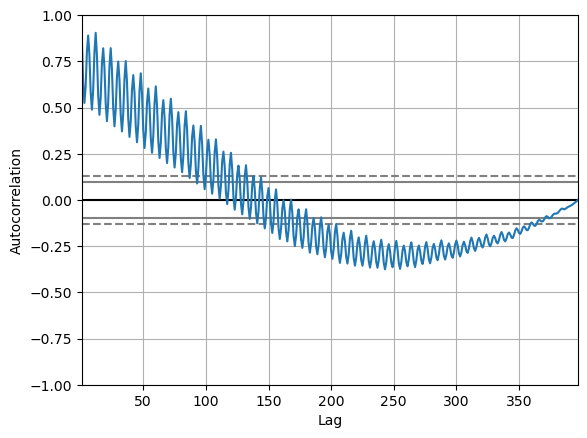

In [14]:
autocorrelation_plot(df['IPG2211A2N'])

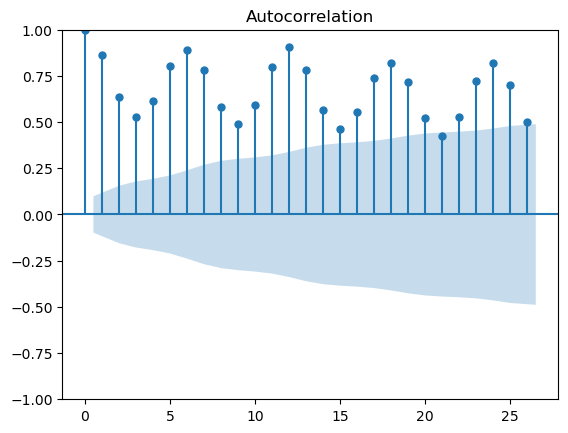

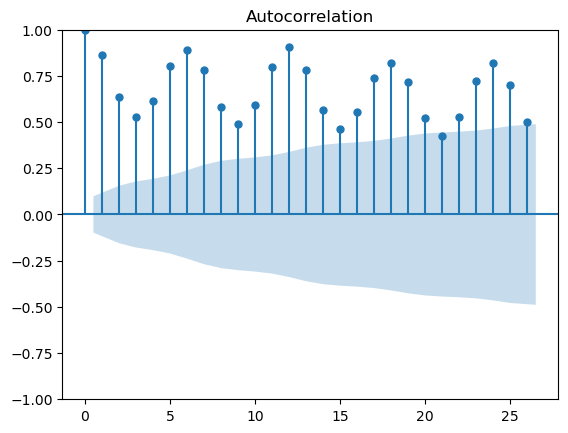

In [15]:
plot_acf(df['IPG2211A2N'])

c:\Users\revai\anaconda3\envs\tf_directx\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


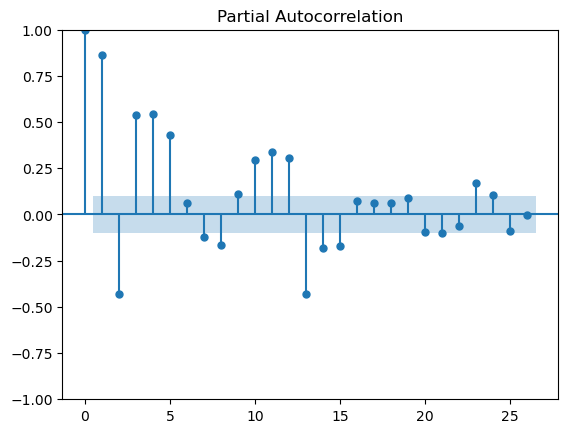

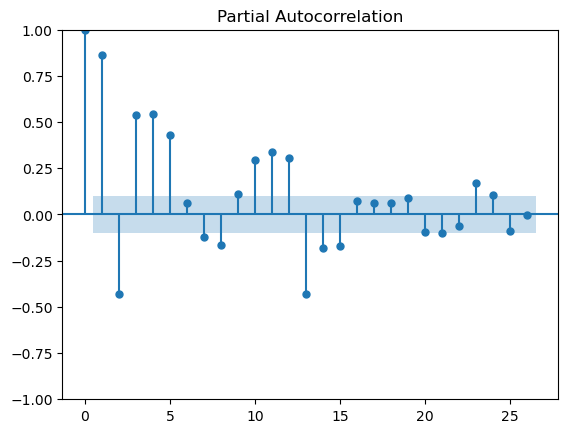

In [16]:
plot_pacf(df["IPG2211A2N"])

In [17]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
model = ARIMA(df['IPG2211A2N'],order=(26,2,6))
result = model.fit()

c:\Users\revai\anaconda3\envs\tf_directx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\revai\anaconda3\envs\tf_directx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\revai\anaconda3\envs\tf_directx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\revai\anaconda3\envs\tf_directx\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\revai\anaconda3\envs\tf_directx\lib\site-packages\statsmodels

In [26]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             IPG2211A2N   No. Observations:                  397
Model:                ARIMA(26, 2, 6)   Log Likelihood                -952.780
Date:                Tue, 29 Oct 2024   AIC                           1971.560
Time:                        17:58:50   BIC                           2102.863
Sample:                             0   HQIC                          2023.583
                                - 397                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0013      1.581     -0.633      0.526      -4.100       2.097
ar.L2         -0.6074      2.887     -0.210      0.833      -6.267       5.052
ar.L3         -0.3195      3.732     -0.086      0.932      -7.633       6.994
ar.L4         -0.6181      3.953     -0.156      0.876      -8.366       7.130
ar.L5         -0.7866      4.679     -0.168      0.866      -9.957       8.384
ar.L6         -0.5785      5.540     -0.104      0.917     -11.436      10.279
ar.L7         -0.4919      6.149     -0.080      0.936     -12.543      11.559
ar.L8         -0.4044      6.597     -0.061      0.951     -13.335      12.526
ar.L9         -0.4130      6.915     -0.060      0.952     -13.967      13.141
ar.L10        -0.3025      7.227     -0.042      0.967     -14.467      13.862
ar.L11        -0.1082      7.372     -0.015      0.988     -14.557      14.341
ar.L12         0.4604      7.229      0.064      0.949     -13.708      14.629
ar.L13         0.3944      6.282      0.063      0.950     -11.917      12.706
ar.L14         0.2210      5.464      0.040      0.968     -10.487      10.929
ar.L15         0.0665      4.888      0.014      0.989      -9.513       9.646
ar.L16         0.2786      4.654      0.060      0.952      -8.843       9.401
ar.L17         0.5246      4.068      0.129      0.897      -7.449       8.498
ar.L18         0.4100      3.191      0.128      0.898      -5.844       6.664
ar.L19         0.3404      2.462      0.138      0.890      -4.485       5.166
ar.L20         0.2577      1.876      0.137      0.891      -3.420       3.935
ar.L21         0.1993      1.432      0.139      0.889      -2.607       3.005
ar.L22         0.0861      1.073      0.080      0.936      -2.018       2.190
ar.L23         0.0048      0.917      0.005      0.996      -1.792       1.802
ar.L24         0.1892      0.886      0.214      0.831      -1.548       1.926
ar.L25         0.2269      0.587      0.386      0.699      -0.924       1.378
ar.L26         0.1077      0.243      0.444      0.657      -0.368       0.583
ma.L1         -0.2581      1.582     -0.163      0.870      -3.358       2.842
ma.L2         -0.7057      1.205     -0.586      0.558      -3.067       1.656
ma.L3         -0.1418      0.704     -0.201      0.840      -1.522       1.238
ma.L4          0.4617      0.545      0.847      0.397      -0.607       1.530
ma.L5          0.0825      0.525      0.157      0.875      -0.946       1.111
ma.L6         -0.3585      0.594     -0.604      0.546      -1.523       0.806
sigma2         7.2755      0.521     13.964      0.000       6.254       8.297
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                36.51
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               2.48   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:       

Diagnostic
- Residuals of fit models are white noise
- Ljung box statistic > 0.05 (p value) then residuals are white noise (H0 accepted)

<AxesSubplot:>

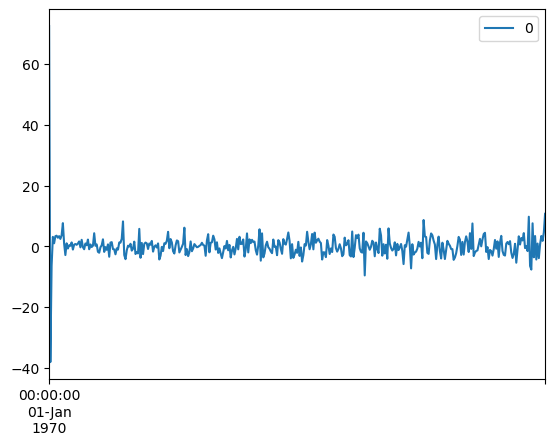

In [20]:
residuals = pd.DataFrame(result.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

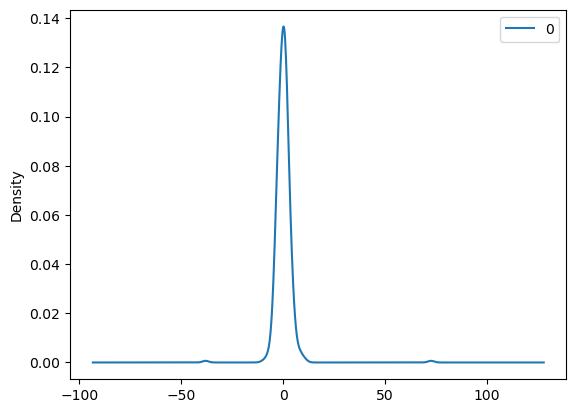

In [21]:
residuals.plot(kind='kde')

In [34]:
df

,DATE,IPG2211A2N
IPG2211A2N,,
72.5052,1985-01-01,72.5052
70.6720,1985-02-01,70.6720
62.4502,1985-03-01,62.4502
57.4714,1985-04-01,57.4714
55.3151,1985-05-01,55.3151
...,...,...
98.6154,2017-09-01,98.6154
93.6137,2017-10-01,93.6137
97.3359,2017-11-01,97.3359


Forecast

In [41]:
pred = result.get_prediction(start=399, dynamic=False)
pred_ci = pred.conf_int()
pred_ci

c:\Users\revai\anaconda3\envs\tf_directx\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


,lower IPG2211A2N,upper IPG2211A2N
399,89.221244,103.138841
